Four Engineering Consultancies are anlayzed. The goal is to see how to they compare with each others using fundamental analysis.

- The companies under Consideration are providing design, consulting, and project management services. Their revenue is often fee-based (contracts, consulting), sometimes tied to large-scale infrastructure or industrial projects.

- Although Arcadis is headquartered in Europe, Stantec in Canda; all the companies have a strong presence in the US market.

- The companies are all publicly listed therefore their financial data are publicly available.

How the selected companies are perceived by the engineering community can be found at the Engineering News Record (ENR). The link is below:

https://www.enr.com/toplists/2025-top-500-design-firms-preview

In [171]:
import numpy as np
import pandas as pd
import yfinance as yf

**Yahoo Finance's publicly available yfinance library API provides access to the financial statements.**

Let's start with **Jacobs** and see how to calculate the enterprise value in 2024.

 Enterprise value (EV) = market capitalization + debt minus cash and cash equivalents


 The literature-based choice of enterprise value enables comparisons of companies with different capital structures.

In [172]:
Jacobs = yf.Ticker('J')

From the balance sheet we can obtain the net debt, the cash and also the number of shares required for calculating the market capitalization.

In [173]:
Jacobs_balance_sheet  = Jacobs.balance_sheet # collect the balance sheet
#Net Debt:
Jacobs_Debt24 = Jacobs_balance_sheet.loc['Net Debt']['2024-09-30']
#Cash and Cash equivalents
Jacobs_Cash24 = Jacobs_balance_sheet.loc['Cash And Cash Equivalents']['2024-09-30']
#Market Cap
Jacobs_num_shares = Jacobs_balance_sheet.loc['Ordinary Shares Number']['2024-09-30'] # collect the number of shares

To calculate the market cap we also need the share price of Jacobs, easily obtained from the historical records of the market.

In [174]:
hist_prices_Jacobs = Jacobs.history(start='2024-12-31', end='2025-01-01') # a dataframe containing historical prices
Jacobs_price = hist_prices_Jacobs['Close'].values[0]


In [175]:
# The EV:
Jacobs_EV = (Jacobs_price * Jacobs_num_shares) + (Jacobs_Debt24 - Jacobs_Cash24)
print('The 2024 Enterprise value of Jacobs is', round(Jacobs_EV/(10**9),2),'Billions USD')

The 2024 Enterprise value of Jacobs is 16.26 Billions USD


We are interested in the EV/EBIT multiple as a measure of the economic value provided by the company to its investors, specifically how much they value the company's operating profit. It is a 'price tag' on the business's operating cash.

In [176]:
Jacobs_income_stat = Jacobs.income_stmt # collect the income statement
Jacobs_EBIT = Jacobs_income_stat.loc['Net Income']['2024-09-30'] # collect the EBIT
#Jacobs_income_stat.loc['Total Revenue']['2024-09-30']
Jacobs_EV_EBIT = Jacobs_EV/Jacobs_EBIT
print('The EV/EBIT multiple of Jacobs is', round(Jacobs_EV_EBIT,1))


The EV/EBIT multiple of Jacobs is 20.2


Investors are willing to pay twenty times **Jacobs**' operational profit.  Let's compare **Jacobs**' prices to those of its competitors to see how expensive **Jacobs**' profits are!

In [177]:
Stantec = yf.Ticker('STN.TO') # Stantec ticker
Stantec_balance_sheet  = Stantec.balance_sheet # collect the balance sheet of the Stantec
#Net Debt:
Stantec_Debt24 = Stantec_balance_sheet.loc['Net Debt']['2024-12-31']
#Cash and Cash equivalents
Stantec_Cash24 = Stantec_balance_sheet.loc['Cash And Cash Equivalents']['2024-12-31']
#Market Cap
Stantec_num_shares = Stantec_balance_sheet.loc['Ordinary Shares Number']['2024-12-31'] # collect the number of shares
#Stantec Price
hist_prices_Stantec = Stantec.history(start='2024-12-31', end='2025-01-01') # a dataframe containing historical prices
Stantec_price = hist_prices_Stantec['Close'].values[0]
# The EV:
Stantec_EV = (Stantec_price * Stantec_num_shares) + (Stantec_Debt24 - Stantec_Cash24)
print('The 2024 Enterprise value of Stantec is', round(Stantec_EV/(10**9),2),'Billions USD')

The 2024 Enterprise value of Stantec is 13.76 Billions USD


In [178]:
Stantec_income_stat = Stantec.income_stmt # collect the income statement
Stantec_EBIT = Stantec_income_stat.loc['Net Income']['2024-12-31'] # collect the EBIT
Stantec_EV_EBIT = Stantec_EV/Stantec_EBIT
print('The EV/EBIT multiple of Stantec is', round(Stantec_EV_EBIT,1))

The EV/EBIT multiple of Stantec is 38.1


It appears that **Stantec** is actually more expensive than Jacobs!

Lets add a third competitor which is actually the top rated engineering consultancy, **AECOM**.

In [179]:
AECOM = yf.Ticker('ACM') # AECOM ticker
AECOM_balance_sheet  = AECOM.balance_sheet  # collect the balance sheet of the AECOM
#Net Debt:
AECOM_Debt24 = AECOM_balance_sheet.loc['Net Debt']['2024-09-30']
#Cash and Cash equivalents
AECOM_Cash24 = AECOM_balance_sheet.loc['Cash And Cash Equivalents']['2024-09-30']
#Market Cap
AECOM_num_shares = AECOM_balance_sheet.loc['Ordinary Shares Number']['2024-09-30'] # collect the number of shares
#AECOM Price
hist_prices_AECOM = AECOM.history(start='2024-09-30', end='2024-10-01') # a dataframe containing historical prices
AECOM_price = hist_prices_AECOM['Close'].values[0]
# The EV:
AECOM_EV = (AECOM_price * AECOM_num_shares) + (AECOM_Debt24 - AECOM_Cash24)
print('The 2024 Enterprise value of AECOM is', round(AECOM_EV/(10**9),2),'Billions USD')


The 2024 Enterprise value of AECOM is 12.91 Billions USD


In [180]:
AECOM_income_stat = AECOM.income_stmt # collect the income statement
AECOM_EBIT = AECOM_income_stat.loc['Net Income']['2024-09-30'] # collect the EBIT
AECOM_EV_EBIT = AECOM_EV/AECOM_EBIT
print('The EV/EBIT multiple of AECOM is', round(AECOM_EV_EBIT,1))

The EV/EBIT multiple of AECOM is 32.1


In terms of value, **AECOM** is closer to **Stantec** than the engineering community has rated it.

Now we conclude with **Arcadis** which is listed in the Europian market eventhough its headquarted in the USA.

In [181]:
Arcadis = yf.Ticker('HIJ.MU') # Arcadis ticker
Arcadis_balance_sheet  = Arcadis.balance_sheet# collect the balance sheet of the Arcadis
#Net Debt:
Arcadis_Debt24 = Arcadis_balance_sheet.loc['Net Debt']['2024-12-31']
#Cash and Cash equivalents
Arcadis_Cash24 = Arcadis_balance_sheet.loc['Cash And Cash Equivalents']['2024-12-31']
#Market Cap
Arcadis_num_shares = Arcadis_balance_sheet.loc['Ordinary Shares Number']['2024-12-31'] # collect the number of shares

The fact that **Arcades** is mainly traded in Europe, the Yahoo API is unable to report its share price, it might if there were OTC transactions recorded.

Therefore the share price is obtained manually form Google finance : https://www.google.com/finance/quote/ARCAD:AMS?window=1Y

In [182]:
#Arcadis Price
Arcadis_price = 55.80 # The price is plugged-in manually
# The EV:
Arcadis_EV = (Arcadis_price * Arcadis_num_shares) + (Arcadis_Debt24 - Arcadis_Cash24)
print('The 2024 Enterprise value of Arcadis is', round(Arcadis_EV/(10**9),2),'Billions Euros')


The 2024 Enterprise value of Arcadis is 5.13 Billions Euros


In [183]:
Arcadis_income_stat = Arcadis.income_stmt # collect the income statement
Arcadis_EBIT = Arcadis_income_stat.loc['Net Income']['2024-12-31'] # collect the EBIT
Arcadis_EV_EBIT = Arcadis_EV/Arcadis_EBIT
print('The EV/EBIT multiple of Arcadis is', round(Arcadis_EV_EBIT,1))

The EV/EBIT multiple of Arcadis is 21.1


There is a slight suggestion up to this point that **Jacobs** & **Arcadis** might be undervalued. Let's check the P/E ratios and the growth prospective.

In [184]:
# collect the basic EPS for all the companies
Jacobs_EPS = Jacobs_income_stat.loc['Basic EPS']['2024-09-30']
Stantec_EPS = Stantec_income_stat.loc['Basic EPS']['2024-12-31']
Arcadis_EPS = Arcadis_income_stat.loc['Basic EPS']['2024-12-31']
AECOM_EPS = AECOM_income_stat.loc['Basic EPS']['2024-09-30']
# Save the P/E ratio for all four companies
Jacobs_PE = Jacobs_price/Jacobs_EPS
Stantec_PE = Stantec_price/Stantec_EPS
Arcadis_PE = Arcadis_price/Arcadis_EPS
AECOM_PE = AECOM_price/AECOM_EPS

In [185]:
## Calculate the percentage grwoth in revenue at 2024 for all four companies:
Jacobs_grwoth = (Jacobs_income_stat.loc['Total Revenue']['2024-09-30'] -
                 Jacobs_income_stat.loc['Total Revenue']['2023-09-30'])/Jacobs_income_stat.loc['Total Revenue']['2023-09-30']
Stantec_grwoth = (Stantec_income_stat.loc['Total Revenue']['2024-12-31'] -
                 Stantec_income_stat.loc['Total Revenue']['2023-12-31'])/Stantec_income_stat.loc['Total Revenue']['2023-12-31']
AECOM_grwoth = (AECOM_income_stat.loc['Total Revenue']['2024-09-30'] -
                 AECOM_income_stat.loc['Total Revenue']['2023-09-30'])/AECOM_income_stat.loc['Total Revenue']['2023-09-30']
Arcadis_grwoth = (Arcadis_income_stat.loc['Total Revenue']['2024-12-31'] -
                 Arcadis_income_stat.loc['Total Revenue']['2023-12-31'])/Arcadis_income_stat.loc['Total Revenue']['2023-12-31']

In [186]:
#Summarize all results in a table:
Rel_Evaluation = pd.DataFrame({'Company': ['Jacobs', 'Stantec', 'AECOM', 'Arcadis'],
                                'Price':[round(Jacobs_price,2),round(Stantec_price,2),
                                       round(AECOM_price,2),round(Arcadis_price,2)],
                               'PE': [round(Jacobs_PE,2), round(Stantec_PE,2), round(AECOM_PE,2), round(Arcadis_PE,2)],
                               'EV/EBIT': [round(Jacobs_EV_EBIT,1), round(Stantec_EV_EBIT,1), round(AECOM_EV_EBIT,1), round(Arcadis_EV_EBIT,1)],
                               'Growth': [round(Jacobs_grwoth*100,2), round(Stantec_grwoth*100,2), round(AECOM_grwoth*100,2), round(Arcadis_grwoth*100,2)],
                               'Adjusted EV/EBIT': [round(Jacobs_EV_EBIT/(Jacobs_grwoth*100),2),round(Stantec_EV_EBIT/(Stantec_grwoth*100),2),
                                                    round(AECOM_EV_EBIT/(AECOM_grwoth*100),2),round(Arcadis_EV_EBIT/(Arcadis_grwoth*100),2)]})

In [187]:
Rel_Evaluation

,Company,Price,PE,EV/EBIT,Growth,Adjusted EV/EBIT
0,Jacobs,131.35,20.69,20.2,5.99,3.37
1,Stantec,112.40,35.46,38.1,15.75,2.42
2,AECOM,102.28,34.44,32.1,12.01,2.67
3,Arcadis,55.80,20.67,21.1,-0.16,-132.00


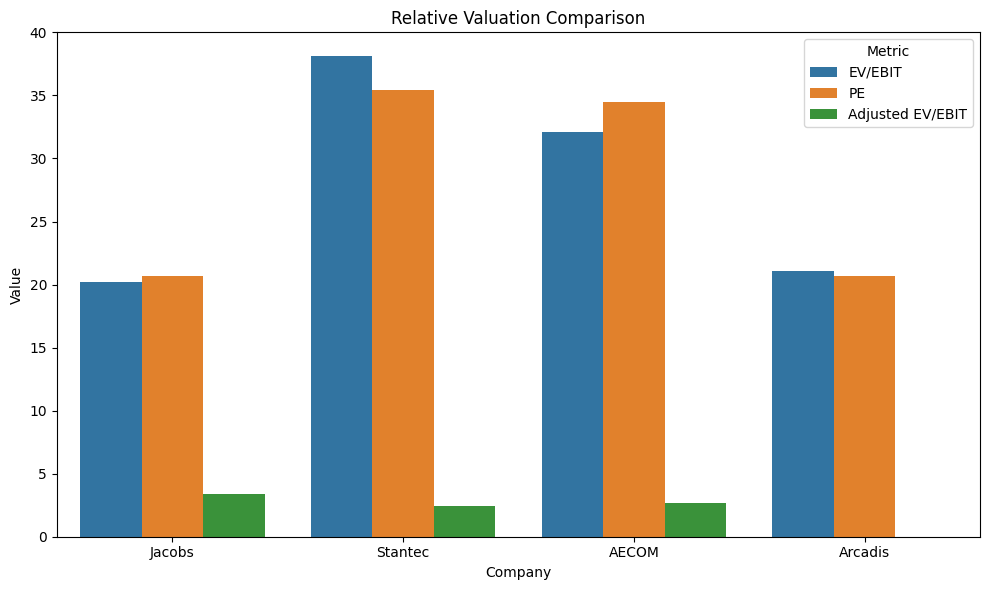

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

Valuation_melted = Rel_Evaluation.melt(
    id_vars="Company",
    value_vars=["EV/EBIT", "PE", "Adjusted EV/EBIT"],
    var_name="Metric",
    value_name="Value"
)

Valuation_melted.loc[11,'Value'] = 0


plt.figure(figsize=(10,6))
sns.barplot(data=Valuation_melted, x="Company", y="Value", hue="Metric")

plt.title("Relative Valuation Comparison")
plt.ylabel("Value")
plt.xlabel("Company")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


- The lower EV/EBIT ratio at which **Jacobs** is trading can be tempting to conclude that Jacobs is cheaper than its peers, judgeing only by what investors are willing to pay today for profits.

- When the valuation is adjusted on growth basis, we can see that Jacobs is actually expensive compared to its other competitors.

- A fair value for **Jacobs** can be obtained to confirm that the company is overvalued.

- Arcades is showing negative growth while trading at an EV/EBIT ratio similar to Jacobs (also see P/E ratio), therefore it was excluded from the analysis.